In [6]:
import os

In [20]:
import random

In [89]:
import zipfile

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import xarray as xr

In [11]:
import matplotlib.pyplot as plt

In [15]:
from scipy.misc import imsave

In [18]:
import imageio

In [117]:
import brainscore

In [60]:
from brainscore import knownfile

In [105]:
from brainscore.lookup import pwdb

In [108]:
from brainscore.assemblies import AssemblyModel, AssemblyStoreMap, AssemblyStoreModel

In [109]:
from brainscore.stimuli import ImageModel, AttributeModel, ImageMetaModel, StimulusSetModel, ImageStoreModel, \
    StimulusSetImageMap, ImageStoreMap

In [4]:
data_dir = "/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017"

In [5]:
ls /braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/

images.npy  README.rtf  responses.npy


In [7]:
resp = np.load(os.path.join(data_dir, "responses.npy"))
resp

array([[[ 6.,  0.,  2., ...,  3.,  4.,  2.],
        [ 4.,  0.,  0., ...,  8.,  5.,  3.],
        [ 2.,  0.,  1., ...,  5.,  2.,  1.],
        ...,
        [ 2.,  0.,  5., ...,  2.,  1.,  1.],
        [ 1.,  0.,  1., ...,  0.,  1.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  1.]],

       [[ 2.,  0.,  2., ...,  7.,  5.,  0.],
        [ 3.,  0.,  1., ..., 10.,  9.,  1.],
        [ 1.,  0.,  1., ...,  3.,  5.,  1.],
        ...,
        [ 2.,  0.,  0., ...,  0.,  3.,  5.],
        [ 2.,  0.,  0., ...,  4.,  3.,  3.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]],

       [[nan, nan, nan, ...,  6.,  3.,  2.],
        [nan, nan, nan, ...,  3.,  7.,  5.],
        [nan, nan, nan, ...,  6.,  4.,  3.],
        ...,
        [nan, nan, nan, ...,  5.,  4.,  4.],
        [nan, nan, nan, ...,  0.,  0.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]],

       [[nan, nan, nan, ...,  5.,  2.,  2.],
        [nan, nan, nan, ...,  8.,  4.,  2.],
        [nan, nan, nan, ...,  3.,  2.,  2.],
        ..

In [8]:
resp.shape

(4, 7250, 166)

In [9]:
im = np.load(os.path.join(data_dir, "images.npy"))
im

array([[[127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        ...,
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5]],

       [[127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        ...,
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5]],

       [[127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        ...,
        [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
        [127.5, 127.5, 127.5, ..., 127.5, 127

In [10]:
im.shape

(7250, 140, 140)

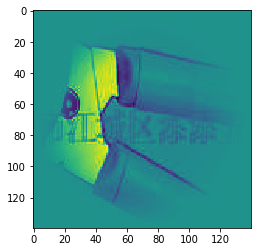

In [12]:
plt.imshow(im[0, :, :])

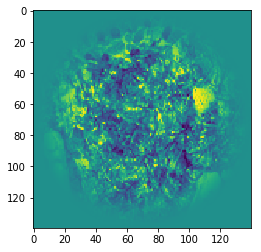

In [13]:
plt.imshow(im[1000, :, :])

## Write image files

In [19]:
imageio.imwrite("im_0.jpg", im[0, :, :])

im_03069.jpg
im_02266.jpg
im_02450.jpg
im_05049.jpg
im_01458.jpg


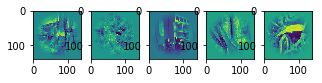

In [36]:
# random.sample(im, 5)
# im[np.random.randint(im.shape[0], size=5), :, :]
# im[np.random.choice(range(im.shape[0]), size=5, replace=False), :, :]
# np.random.choice(range(im.shape[0]), size=5, replace=False)
fig=plt.figure(figsize=(5, 1))


for i, idx in enumerate(np.random.choice(range(im.shape[0]), size=5, replace=False)):
#     imageio.imwrite("im_0.jpg", im[i, :, :])
    plt.subplot(1, 5, i+1)
    one_im = im[idx, :, :]
    plt.imshow(one_im)
    file_name  = "im_{:05}.jpg".format(idx)
    print(file_name)
    imageio.imwrite(file_name, one_im)

In [37]:
retrieve = imageio.imread("im_01458.jpg")
retrieve

Image([[150, 150, 150, ..., 150, 150, 150],
       [150, 150, 150, ..., 150, 150, 150],
       [150, 150, 150, ..., 150, 150, 150],
       ...,
       [150, 150, 150, ..., 150, 150, 150],
       [150, 150, 150, ..., 150, 150, 150],
       [150, 150, 150, ..., 150, 150, 150]], dtype=uint8)

In [38]:
retrieve.max()

255

In [39]:
im[1458, :, :]

array([[127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
       [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
       [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
       ...,
       [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
       [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5],
       [127.5, 127.5, 127.5, ..., 127.5, 127.5, 127.5]], dtype=float32)

In [40]:
im[1458, :, :].max()

185.0

In [41]:
im[1458, :, :].astype("uint8")

array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=uint8)

In [42]:
im[1458, :, :].astype("uint8").max()

185

im_05092.jpg
im_00645.jpg
im_02176.jpg
im_01704.jpg
im_04606.jpg


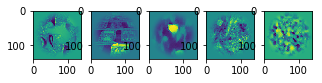

In [43]:
fig=plt.figure(figsize=(5, 1))
for i, idx in enumerate(np.random.choice(range(im.shape[0]), size=5, replace=False)):
    plt.subplot(1, 5, i+1)
    one_im = im[idx, :, :].astype("uint8")
    plt.imshow(one_im)
    file_name  = "im_{:05}.jpg".format(idx)
    print(file_name)
    imageio.imwrite(file_name, one_im)

In [45]:
im[5092, :, :].max()

219.0

In [46]:
imageio.imread("im_05092.jpg").max()

228

In [47]:
im[5092, :, :].astype("uint8").max()

219

In [49]:
imageio.help("JPEG-PIL")

JPEG-PIL - JPEG (ISO 10918)

    A JPEG format based on Pillow.
    
    This format supports grayscale, RGB and RGBA images.
    
    Parameters for reading
    ----------------------
    exifrotate : bool
        Automatically rotate the image according to exif flag. Default True.
    pilmode : str
        From the Pillow documentation:
        
        * 'L' (8-bit pixels, grayscale)
        * 'P' (8-bit pixels, mapped to any other mode using a color palette)
        * 'RGB' (3x8-bit pixels, true color)
        * 'RGBA' (4x8-bit pixels, true color with transparency mask)
        * 'CMYK' (4x8-bit pixels, color separation)
        * 'YCbCr' (3x8-bit pixels, color video format)
        * 'I' (32-bit signed integer pixels)
        * 'F' (32-bit floating point pixels)
        
        PIL also provides limited support for a few special modes, including
        'LA' ('L' with alpha), 'RGBX' (true color with padding) and 'RGBa'
        (true color with premultiplied alpha).
        
     

im_01493.jpg
im_05471.jpg
im_02780.jpg
im_06317.jpg
im_06433.jpg


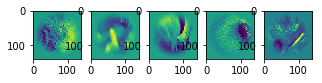

In [50]:
fig=plt.figure(figsize=(5, 1))
for i, idx in enumerate(np.random.choice(range(im.shape[0]), size=5, replace=False)):
    plt.subplot(1, 5, i+1)
    one_im = im[idx, :, :].astype("uint8")
    plt.imshow(one_im)
    file_name  = "im_{:05}.jpg".format(idx)
    print(file_name)
    imageio.imwrite(file_name, one_im, quality=100)

In [52]:
im[1493, :, :].max()

227.4961

In [53]:
imageio.imread("im_01493.jpg").max()

227

In [54]:
mkdir $data_dir/images

In [55]:
ls $data_dir

images/  images.npy  README.rtf  responses.npy


## Make the image zip file

In [76]:
image_metas = [{"image_index": i} for i in range(im.shape[0])]
for image_meta in image_metas:
    i = image_meta["image_index"]
    one_im = image_meta["one_im"] = im[i, :, :].astype("uint8")
    file_name = image_meta["file_name"] = "image_{:05}.jpg".format(i)
    file_path = image_meta["file_path"] = os.path.join(data_dir, "images", file_name)
    print(file_path)
    imageio.imwrite(file_path, one_im, quality=100)
    kf_im = image_meta["kf_im"] = knownfile.KnownFile(file_path)
    sha1 = image_meta["sha1"] = kf_im.sha1

/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00000.jpg
/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00001.jpg
/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00002.jpg
/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00003.jpg
/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00004.jpg
/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00005.jpg
/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00006.jpg
/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00007.jpg
/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00008.jpg
/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00009.jpg
/braintree/data2/active/users/jjpr/mkgu_

In [77]:
image_metas

[{'file_name': 'image_00000.jpg',
  'file_path': '/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00000.jpg',
  'image_index': 0,
  'kf_im': <brainscore.knownfile.KnownFile at 0x7f4e3e74e710>,
  'one_im': array([[127, 127, 127, ..., 127, 127, 127],
         [127, 127, 127, ..., 127, 127, 127],
         [127, 127, 127, ..., 127, 127, 127],
         ...,
         [127, 127, 127, ..., 127, 127, 127],
         [127, 127, 127, ..., 127, 127, 127],
         [127, 127, 127, ..., 127, 127, 127]], dtype=uint8),
  'sha1': '0fe27ddd5b9ea701e380063dc09b91234eba3551'},
 {'file_name': 'image_00001.jpg',
  'file_path': '/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00001.jpg',
  'image_index': 1,
  'kf_im': <brainscore.knownfile.KnownFile at 0x7f4e3ea296d8>,
  'one_im': array([[127, 127, 127, ..., 127, 127, 127],
         [127, 127, 127, ..., 127, 127, 127],
         [127, 127, 127, ..., 127, 127, 127],
         ...,
      

In [78]:
df_image_meta = pd.DataFrame(image_metas)
df_image_meta

,file_name,file_path,image_index,kf_im,one_im,sha1
0,image_00000.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,0,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",0fe27ddd5b9ea701e380063dc09b91234eba3551
1,image_00001.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,1,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",12998de4efb493e58e6f78ad556dc1a0292187b4
2,image_00002.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,2,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",8ec2f527c7a96b382eb0356e32930062819d73f2
3,image_00003.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,3,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",ade885870a542045bf879135efcd8a289e598515
4,image_00004.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,4,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",7599744b0a512c2b2792e0e4c04cc61ceb68f7f8
5,image_00005.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,5,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",f1b42d9eba735facc365f0f7b51ae15ab44aae67
6,image_00006.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,6,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",912a7aa802c92c85062881d4859be458083e2288
7,image_00007.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,7,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",6fe84d87a02b4c2a5c993739f937075ad6bb2a2c
8,image_00008.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,8,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",31b8cd844b204d963f606f376cfdc74ddcc6cfd8
9,image_00009.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,9,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",4604fd5cc4bade0434b3b738b69680807c262945


In [79]:
df_image_meta.shape

(7250, 6)

In [80]:
len(np.unique(df_image_meta["sha1"].values))

7249

In [82]:
df_dupes = df_image_meta.groupby("sha1").filter(lambda x: len(x) > 1)
df_dupes

,file_name,file_path,image_index,kf_im,one_im,sha1
85,image_00085.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,85,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",beb36653cac14c0a409a904b4330e668fe14048f
2198,image_02198.jpg,/braintree/data2/active/users/jjpr/mkgu_packag...,2198,<brainscore.knownfile.KnownFile object at 0x7f...,"[[127, 127, 127, 127, 127, 127, 127, 127, 127,...",beb36653cac14c0a409a904b4330e668fe14048f


/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_00085.jpg


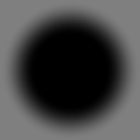

/braintree/data2/active/users/jjpr/mkgu_packaging/tolias/data_cadena2017/images/image_02198.jpg


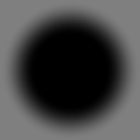

In [84]:
from IPython.core.display import Image, display
for p in df_dupes["file_path"]:
    print(p)
    display(Image(p))

In [152]:
df_image_meta.drop(85).groupby("sha1").filter(lambda x: len(x) > 1)

,file_name,file_path,image_index,kf_im,one_im,sha1


In [153]:
df_image_meta = df_image_meta.drop(85)

In [58]:
ls $data_dir/images

image_00000.jpg  image_01813.jpg  image_03626.jpg  image_05439.jpg
image_00001.jpg  image_01814.jpg  image_03627.jpg  image_05440.jpg
image_00002.jpg  image_01815.jpg  image_03628.jpg  image_05441.jpg
image_00003.jpg  image_01816.jpg  image_03629.jpg  image_05442.jpg
image_00004.jpg  image_01817.jpg  image_03630.jpg  image_05443.jpg
image_00005.jpg  image_01818.jpg  image_03631.jpg  image_05444.jpg
image_00006.jpg  image_01819.jpg  image_03632.jpg  image_05445.jpg
image_00007.jpg  image_01820.jpg  image_03633.jpg  image_05446.jpg
image_00008.jpg  image_01821.jpg  image_03634.jpg  image_05447.jpg
image_00009.jpg  image_01822.jpg  image_03635.jpg  image_05448.jpg
image_00010.jpg  image_01823.jpg  image_03636.jpg  image_05449.jpg
image_00011.jpg  image_01824.jpg  image_03637.jpg  image_05450.jpg
image_00012.jpg  image_01825.jpg  image_03638.jpg  image_05451.jpg
image_00013.jpg  image_01826.jpg  image_03639.jpg  image_05452.jpg
image_00014.jpg  image_01827.jpg  image_03640.jpg  image_05453

In [61]:
kf_0 = knownfile.KnownFile("im_0.jpg")
kf_0

In [62]:
kf_0.sha1

'bfc6bf6e24cba35a4ac2071add1507b6a3f64eb1'

In [155]:
target_zip_path = "/braintree/home/jjpr/.brainscore/data/tolias.Cadena2017/v1_stimuli.zip"

In [87]:
!mkdir -p {os.path.dirname(target_zip_path)}

In [156]:
with zipfile.ZipFile(target_zip_path, 'w') as target_zip:
    for image in df_image_meta.itertuples():
        target_zip.write(image.file_path, arcname="v1_stimuli/" + image.file_name)

In [93]:
containing_dir = os.path.dirname(target_zip_path)
with zipfile.ZipFile(target_zip_path, 'r') as new_zip:
    new_zip.extractall(containing_dir)

## Make the .nc file

In [126]:
initial_dims = ["repetition", "stimulus", "neuroid", "time_bin"]

In [100]:
coords_repetition = {"repetition_id": ("repetition", range(resp.shape[0]))}

In [95]:
df_image_meta.columns

Index(['file_name', 'file_path', 'image_index', 'kf_im', 'one_im', 'sha1'], dtype='object')

In [96]:
coords_stimulus = {}
stimulus_map = {"image_id": "sha1"}
for col in stimulus_map:
    col_ser = df_image_meta[stimulus_map[col]]
    coords_stimulus[col] = ("stimulus", col_ser)

In [97]:
coords_neuroid = {"neuroid_id": ("neuroid", range(resp.shape[2]))}

In [123]:
coords_time_bin = {
    "time_bin_start": ("time_bin", [40.0]),
    "time_bin_end": ("time_bin", [100.0])
}

In [124]:
coords = {**coords_repetition, **coords_stimulus, **coords_neuroid, **coords_time_bin}
coords

{'image_id': ('stimulus', 0       0fe27ddd5b9ea701e380063dc09b91234eba3551
  1       12998de4efb493e58e6f78ad556dc1a0292187b4
  2       8ec2f527c7a96b382eb0356e32930062819d73f2
  3       ade885870a542045bf879135efcd8a289e598515
  4       7599744b0a512c2b2792e0e4c04cc61ceb68f7f8
  5       f1b42d9eba735facc365f0f7b51ae15ab44aae67
  6       912a7aa802c92c85062881d4859be458083e2288
  7       6fe84d87a02b4c2a5c993739f937075ad6bb2a2c
  8       31b8cd844b204d963f606f376cfdc74ddcc6cfd8
  9       4604fd5cc4bade0434b3b738b69680807c262945
  10      a42efa12412724e61f9a52653fa7f93c4c5e41c6
  11      9e4198573031e1632cca1a7612f1e6241dc91f6d
  12      1906fc70cfe15c581882c08364b9cad3fe8258ff
  13      8a78a1c5fdc976cc67fa3a63b4b9e69afa6f45db
  14      1ef7c42fe68affd3cf5f77f7db10e5a9b7a79ff0
  15      819e923a283fe137492b4ee7e3932716de743fff
  16      d74f8d234aab7d538e94c17e4498a3192295f7c6
  17      d93c16adfaf0207055fea93da7f3a73f411c53fd
  18      c222a1c82cd9410ba188956b56fee5682624f712
  19   

In [127]:
da_resp = xr.DataArray(data=np.expand_dims(resp, 3), dims=initial_dims, coords=coords)
da_resp

<xarray.DataArray (repetition: 4, stimulus: 7250, neuroid: 166, time_bin: 1)>
array([[[[ 6.],
         ...,
         [ 2.]],

        ...,

        [[ 1.],
         ...,
         [ 1.]]],


       ...,


       [[[nan],
         ...,
         [ 2.]],

        ...,

        [[nan],
         ...,
         [ 1.]]]])
Coordinates:
    repetition_id   (repetition) int64 0 1 2 3
    image_id        (stimulus) object '0fe27ddd5b9ea701e380063dc09b91234eba3551' ...
    neuroid_id      (neuroid) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
    time_bin_start  (time_bin) float64 40.0
    time_bin_end    (time_bin) float64 100.0
Dimensions without coordinates: repetition, stimulus, neuroid, time_bin

In [128]:
stacked = da_resp.stack(presentation=("repetition", "stimulus"))
transposed = stacked.transpose("neuroid", "presentation", "time_bin")
transposed

<xarray.DataArray (neuroid: 166, presentation: 29000, time_bin: 1)>
array([[[ 6.],
        [ 4.],
        ...,
        [nan],
        [nan]],

       [[ 0.],
        [ 0.],
        ...,
        [nan],
        [nan]],

       ...,

       [[ 4.],
        [ 5.],
        ...,
        [ 1.],
        [ 0.]],

       [[ 2.],
        [ 3.],
        ...,
        [ 7.],
        [ 1.]]])
Coordinates:
    repetition_id   (presentation) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    image_id        (presentation) object '0fe27ddd5b9ea701e380063dc09b91234eba3551' ...
    neuroid_id      (neuroid) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
    time_bin_start  (time_bin) float64 40.0
    time_bin_end    (time_bin) float64 100.0
  * presentation    (presentation) MultiIndex
  - repetition      (presentation) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - stimulus        (presentation) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
Dimensions without coordinates: neuroid, time_bin

In [129]:
transposed.reset_index("presentation", inplace=True)
transposed

<xarray.DataArray (neuroid: 166, presentation: 29000, time_bin: 1)>
array([[[ 6.],
        [ 4.],
        ...,
        [nan],
        [nan]],

       [[ 0.],
        [ 0.],
        ...,
        [nan],
        [nan]],

       ...,

       [[ 4.],
        [ 5.],
        ...,
        [ 1.],
        [ 0.]],

       [[ 2.],
        [ 3.],
        ...,
        [ 7.],
        [ 1.]]])
Coordinates:
    repetition_id   (presentation) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    image_id        (presentation) object '0fe27ddd5b9ea701e380063dc09b91234eba3551' ...
    neuroid_id      (neuroid) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
    time_bin_start  (time_bin) float64 40.0
    time_bin_end    (time_bin) float64 100.0
    repetition      (presentation) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    stimulus        (presentation) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
Dimensions without coordinates: neuroid, presentation, time_bin

In [133]:
transposed = transposed.drop(["repetition", "stimulus"])
transposed

<xarray.DataArray (neuroid: 166, presentation: 29000, time_bin: 1)>
array([[[ 6.],
        [ 4.],
        ...,
        [nan],
        [nan]],

       [[ 0.],
        [ 0.],
        ...,
        [nan],
        [nan]],

       ...,

       [[ 4.],
        [ 5.],
        ...,
        [ 1.],
        [ 0.]],

       [[ 2.],
        [ 3.],
        ...,
        [ 7.],
        [ 1.]]])
Coordinates:
    repetition_id   (presentation) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    image_id        (presentation) object '0fe27ddd5b9ea701e380063dc09b91234eba3551' ...
    neuroid_id      (neuroid) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
    time_bin_start  (time_bin) float64 40.0
    time_bin_end    (time_bin) float64 100.0
Dimensions without coordinates: neuroid, presentation, time_bin

In [134]:
target_netcdf_file = "/braintree/home/jjpr/.brainscore/data/tolias.Cadena2017/v1_responses.nc"

In [135]:
transposed.to_netcdf(target_netcdf_file)

## Make the StimulusSet lookup meta

In [162]:
pwdb.close()

True

In [163]:
pwdb.connect(reuse_if_open=True)

True

In [164]:
stim_set_model, created = StimulusSetModel.get_or_create(name="tolias.Cadena2017")

In [165]:
image_store, created = ImageStoreModel.get_or_create(location_type="S3", store_type="zip",
                                  location="https://mkgu-tolias.s3.amazonaws.com/v1_stimuli.zip")

In [166]:
eav_image_file_sha1, created = AttributeModel.get_or_create(name="image_file_sha1", type="str")
eav_image_file_name, created = AttributeModel.get_or_create(name="image_file_name", type="str")
eav_image_index, created = AttributeModel.get_or_create(name="image_index", type="str")

In [167]:
for image in df_image_meta.itertuples():
    pw_image = ImageModel(image_id=image.sha1)
    pw_stimulus_set_image_map = StimulusSetImageMap(stimulus_set=stim_set_model, image=pw_image)
    pw_image_image_store_map = ImageStoreMap(image=pw_image, image_store=image_store,
                                             path="v1_stimuli/" + image.file_name)
    pw_image.save()
    pw_stimulus_set_image_map.save()
    pw_image_image_store_map.save()
    ImageMetaModel(image=pw_image, attribute=eav_image_file_sha1, value=str(image.sha1)).save()
    ImageMetaModel(image=pw_image, attribute=eav_image_file_name, value=str(image.file_name)).save()
    ImageMetaModel(image=pw_image, attribute=eav_image_index, value=str(image.image_index)).save()

In [168]:
stimulus_set = brainscore.get_stimulus_set("tolias.Cadena2017")
stimulus_set

,id,image_id,image_file_sha1,image_file_name,image_index
0,125778,0fe27ddd5b9ea701e380063dc09b91234eba3551,0fe27ddd5b9ea701e380063dc09b91234eba3551,image_00000.jpg,0
1,125779,12998de4efb493e58e6f78ad556dc1a0292187b4,12998de4efb493e58e6f78ad556dc1a0292187b4,image_00001.jpg,1
2,125780,8ec2f527c7a96b382eb0356e32930062819d73f2,8ec2f527c7a96b382eb0356e32930062819d73f2,image_00002.jpg,2
3,125781,ade885870a542045bf879135efcd8a289e598515,ade885870a542045bf879135efcd8a289e598515,image_00003.jpg,3
4,125782,7599744b0a512c2b2792e0e4c04cc61ceb68f7f8,7599744b0a512c2b2792e0e4c04cc61ceb68f7f8,image_00004.jpg,4
5,125783,f1b42d9eba735facc365f0f7b51ae15ab44aae67,f1b42d9eba735facc365f0f7b51ae15ab44aae67,image_00005.jpg,5
6,125784,912a7aa802c92c85062881d4859be458083e2288,912a7aa802c92c85062881d4859be458083e2288,image_00006.jpg,6
7,125785,6fe84d87a02b4c2a5c993739f937075ad6bb2a2c,6fe84d87a02b4c2a5c993739f937075ad6bb2a2c,image_00007.jpg,7
8,125786,31b8cd844b204d963f606f376cfdc74ddcc6cfd8,31b8cd844b204d963f606f376cfdc74ddcc6cfd8,image_00008.jpg,8
9,125787,4604fd5cc4bade0434b3b738b69680807c262945,4604fd5cc4bade0434b3b738b69680807c262945,image_00009.jpg,9


## Make the DataAssembly lookup meta

In [169]:
assy, created = AssemblyModel.get_or_create(name="tolias.Cadena2017", assembly_class="NeuronRecordingAssembly",
                     stimulus_set=stim_set_model)
assy.save()

1

In [170]:
store = AssemblyStoreModel(assembly_type="netCDF",
                           location_type="S3",
                           location="https://mkgu-tolias.s3.amazonaws.com/v1_responses.nc")
store.save()

1

In [171]:
assy_store_map = AssemblyStoreMap(assembly_model=assy, assembly_store_model=store, role="tolias.Cadena2017")
assy_store_map.save()

1

## Test

In [172]:
tolias_v1 = brainscore.get_assembly("tolias.Cadena2017")
tolias_v1

<xarray.NeuronRecordingAssembly (neuroid: 166, presentation: 29000, time_bin: 1)>
array([[[ 6.],
        [ 4.],
        ...,
        [nan],
        [nan]],

       [[ 0.],
        [ 0.],
        ...,
        [nan],
        [nan]],

       ...,

       [[ 4.],
        [ 5.],
        ...,
        [ 1.],
        [ 0.]],

       [[ 2.],
        [ 3.],
        ...,
        [ 7.],
        [ 1.]]])
Coordinates:
  * neuroid          (neuroid) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
  * presentation     (presentation) MultiIndex
  - repetition_id    (presentation) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - image_id         (presentation) object '0fe27ddd5b9ea701e380063dc09b91234eba3551' ...
  - id               (presentation) int64 125778 125779 125780 125781 125782 ...
  - image_file_sha1  (presentation) object '0fe27ddd5b9ea701e380063dc09b91234eba3551' ...
  - image_file_name  (presentation) object 'image_00000.jpg' ...
  - image_index      (presentation) object '0' '1' '2' '3' '

In [137]:
raw_da = xr.open_dataarray(target_netcdf_file)
raw_da

<xarray.DataArray (neuroid: 166, presentation: 29000, time_bin: 1)>
[4814000 values with dtype=float64]
Coordinates:
    repetition_id   (presentation) int64 ...
    image_id        (presentation) object ...
    neuroid_id      (neuroid) int64 ...
    time_bin_start  (time_bin) float64 ...
    time_bin_end    (time_bin) float64 ...
Dimensions without coordinates: neuroid, presentation, time_bin

In [141]:
from collections import OrderedDict, defaultdict

def coords_for_dim(xr_data, dim, exclude_indexes=True):
    result = OrderedDict()
    for key, value in xr_data.coords.variables.items():
        only_this_dim = value.dims == (dim,)
        exclude_because_index = exclude_indexes and isinstance(value, xr.IndexVariable)
        if only_this_dim and not exclude_because_index:
            result[key] = value
    return result

In [143]:
coords_for_dim(da_resp, "presentation")

OrderedDict()

In [144]:
df_of_coords = pd.DataFrame(coords_for_dim(raw_da, "presentation"))
df_of_coords

,repetition_id,image_id
0,0,0fe27ddd5b9ea701e380063dc09b91234eba3551
1,0,12998de4efb493e58e6f78ad556dc1a0292187b4
2,0,8ec2f527c7a96b382eb0356e32930062819d73f2
3,0,ade885870a542045bf879135efcd8a289e598515
4,0,7599744b0a512c2b2792e0e4c04cc61ceb68f7f8
5,0,f1b42d9eba735facc365f0f7b51ae15ab44aae67
6,0,912a7aa802c92c85062881d4859be458083e2288
7,0,6fe84d87a02b4c2a5c993739f937075ad6bb2a2c
8,0,31b8cd844b204d963f606f376cfdc74ddcc6cfd8
9,0,4604fd5cc4bade0434b3b738b69680807c262945


In [145]:
merged = df_of_coords.merge(stimulus_set, on="image_id", how="left")

In [146]:
merged

,repetition_id,image_id,id,image_file_sha1,image_file_name,image_index
0,0,0fe27ddd5b9ea701e380063dc09b91234eba3551,125778,0fe27ddd5b9ea701e380063dc09b91234eba3551,image_00000.jpg,0
1,0,12998de4efb493e58e6f78ad556dc1a0292187b4,125779,12998de4efb493e58e6f78ad556dc1a0292187b4,image_00001.jpg,1
2,0,8ec2f527c7a96b382eb0356e32930062819d73f2,125780,8ec2f527c7a96b382eb0356e32930062819d73f2,image_00002.jpg,2
3,0,ade885870a542045bf879135efcd8a289e598515,125781,ade885870a542045bf879135efcd8a289e598515,image_00003.jpg,3
4,0,7599744b0a512c2b2792e0e4c04cc61ceb68f7f8,125782,7599744b0a512c2b2792e0e4c04cc61ceb68f7f8,image_00004.jpg,4
5,0,f1b42d9eba735facc365f0f7b51ae15ab44aae67,125783,f1b42d9eba735facc365f0f7b51ae15ab44aae67,image_00005.jpg,5
6,0,912a7aa802c92c85062881d4859be458083e2288,125784,912a7aa802c92c85062881d4859be458083e2288,image_00006.jpg,6
7,0,6fe84d87a02b4c2a5c993739f937075ad6bb2a2c,125785,6fe84d87a02b4c2a5c993739f937075ad6bb2a2c,image_00007.jpg,7
8,0,31b8cd844b204d963f606f376cfdc74ddcc6cfd8,125786,31b8cd844b204d963f606f376cfdc74ddcc6cfd8,image_00008.jpg,8
9,0,4604fd5cc4bade0434b3b738b69680807c262945,125787,4604fd5cc4bade0434b3b738b69680807c262945,image_00009.jpg,9


In [147]:
stimulus_set.shape

(7250, 5)

In [148]:
stimulus_set.shape[0] * 4

29000

In [150]:
np.unique(stimulus_set["image_id"]).shape

(7249,)

In [177]:
tolias_v1_download = brainscore.get_assembly("tolias.Cadena2017")
tolias_v1_download

getting v1_responses.nc
getting v1_stimuli.zip


<xarray.NeuronRecordingAssembly (neuroid: 166, presentation: 29000, time_bin: 1)>
array([[[ 6.],
        [ 4.],
        ...,
        [nan],
        [nan]],

       [[ 0.],
        [ 0.],
        ...,
        [nan],
        [nan]],

       ...,

       [[ 4.],
        [ 5.],
        ...,
        [ 1.],
        [ 0.]],

       [[ 2.],
        [ 3.],
        ...,
        [ 7.],
        [ 1.]]])
Coordinates:
  * neuroid          (neuroid) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
  * presentation     (presentation) MultiIndex
  - repetition_id    (presentation) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - image_id         (presentation) object '0fe27ddd5b9ea701e380063dc09b91234eba3551' ...
  - id               (presentation) int64 125778 125779 125780 125781 125782 ...
  - image_file_sha1  (presentation) object '0fe27ddd5b9ea701e380063dc09b91234eba3551' ...
  - image_file_name  (presentation) object 'image_00000.jpg' ...
  - image_index      (presentation) object '0' '1' '2' '3' '

In [176]:
import importlib
import boto3
importlib.reload(boto3)

<module 'boto3' from '/braintree/home/jjpr/anaconda3/envs/mkgu_packaging/lib/python3.6/site-packages/boto3/__init__.py'>